In [1]:
# flake8-noqa-cell-E402-E114-E116
import sys

sys.path.insert(0, "material/")

import pandas as pd

from career_decisions_analysis import get_prepare_career_decisions_data
from career_decisions_analysis import get_working_experience
from career_decisions_analysis import get_choices
from career_decisions_analysis import get_average_wages
from career_decisions_analysis import get_initial_schooling
from career_decisions_analysis import get_initial_schooling_activity
from career_decisions_analysis import make_transition_matrix
from career_decisions_analysis import get_df_transition_probabilities

from career_decisions_plot import plot_sample_size
from career_decisions_plot import plot_decisions_by_age
from career_decisions_plot import plot_wage_moments
from career_decisions_plot import plot_initial_schooling
from career_decisions_plot import plot_transition_heatmap

from career_decisions_auxiliary import display_side_by_side

pd.options.display.float_format = "{:,.2f}".format

In [2]:
import pandas as pd
import numpy as np

# We ensure a proper formatting of the wage variable.
pd.options.display.float_format = '{:,.2f}'.format

# We label and format the different columns.
dtype = {'Identifier': np.int, 'Age': np.int,  'Schooling': np.int,  'Choice': 'category'}

# We read the original data file.
df = pd.read_csv('ext_kw_data.csv', dtype=dtype)

# We label the different choice categories.
df['Choice'].replace(['schooling', 'home', 'blue_collar', 'white_collar', 'military'],
                    ['Schooling', 'Home', 'Blue', 'White', 'Military'], inplace=True)

# We set the index for easier interpretability.
df['Period'] = df['Age'] - 16
df.set_index(['Identifier', 'Period'], inplace=True, drop=True)

In [3]:
df.head(15)

Age  Schooling     Choice      Wage
Identifier Period                                     
6          0        16         11  Schooling       nan
           1        17         12  Schooling       nan
           2        18         13  Schooling       nan
           3        19         14  Schooling       nan
           4        20         15  Schooling       nan
           5        21         16       Home       nan
           6        22         16      White 13,773.24
           7        23         16      White 15,690.82
           8        24         16      White 18,635.95
           9        25         16      White 19,649.71
           10       26         16      White 20,659.24
           11       27         16      White 21,127.90
           12       28         16      White 20,042.24
           13       29         16      White 22,649.11
           14       30         16      White 21,604.74

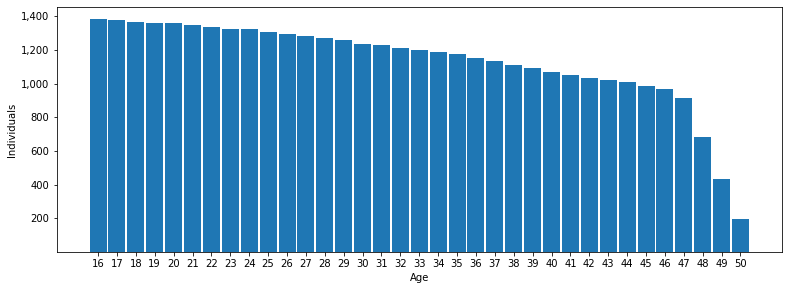

In [4]:
plot_sample_size(df)

In [5]:
display_side_by_side(get_choices(df)["total"], get_choices(df)["share"])

,Blue,White,Military,Schooling,Home,All
Age,,,,,,
16,57,7,1,1174,146,1385
17,122,12,20,1029,196,1379
18,352,93,72,561,290,1368
19,429,127,106,418,281,1361
20,484,157,113,337,268,1359
21,551,181,104,248,267,1351
22,585,277,88,180,206,1336
23,598,352,67,110,200,1327
24,597,423,71,74,158,1323


In [6]:
pd.crosstab(index=df['Age'], columns=df['Choice'], margins=True)

Choice,Blue,Home,Military,Schooling,White,All
Age,,,,,,
16,57,146,1,1174,7,1385
17,122,196,20,1029,12,1379
18,352,290,72,561,93,1368
19,429,281,106,418,127,1361
20,484,268,113,337,157,1359
21,551,267,104,248,181,1351
22,585,206,88,180,277,1336
23,598,200,67,110,352,1327
24,597,158,71,74,423,1323


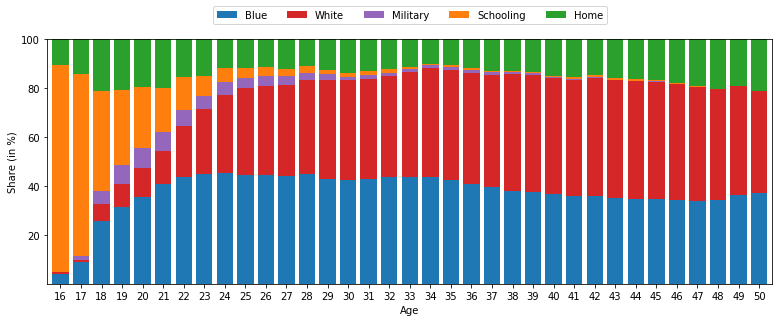

In [7]:
plot_decisions_by_age(df)

In [8]:
get_average_wages(df)

,Blue,Military,White,All
Age,,,,
16,"9,648.17","8,509.16","12,301.07","9,906.16"
17,"11,145.03","9,176.57","9,237.11","10,682.12"
18,"12,008.21","9,765.11","12,050.71","11,682.94"
19,"13,178.46","9,546.65","12,517.79","12,410.07"
20,"14,592.66","10,795.39","14,054.15","13,822.18"
21,"15,567.41","12,358.96","15,555.31","15,136.76"
22,"16,827.01","14,346.82","20,298.33","17,575.02"
23,"18,236.01","15,466.69","21,343.24","19,142.84"
24,"19,000.70","17,777.53","22,513.52","20,315.32"


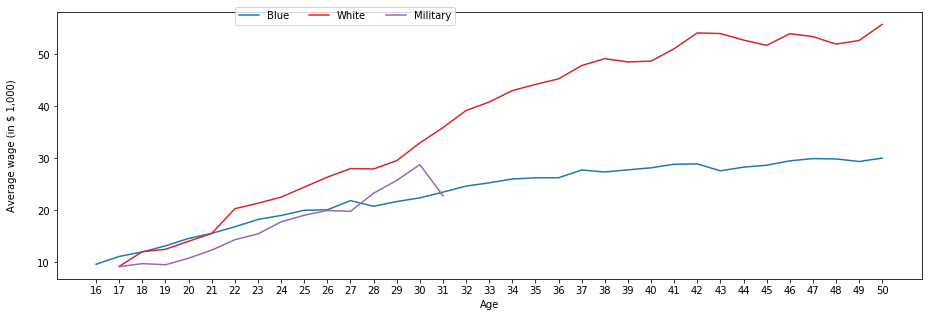

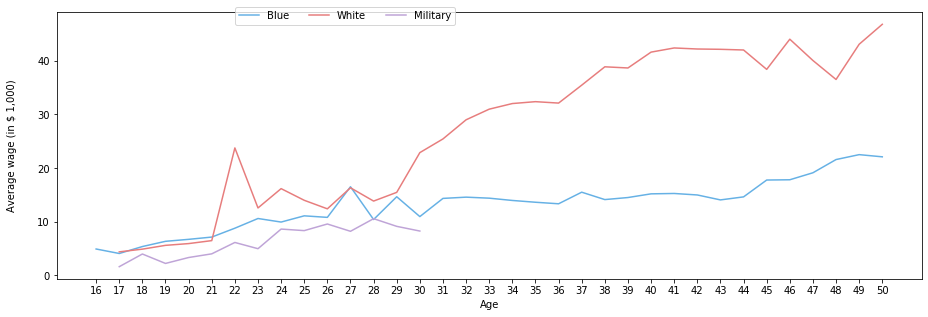

In [9]:
plot_wage_moments(df, savgol=False)